In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy.stats import ttest_ind
import plotly.express as px

### The above shows that  necessary libraries have been imported.

In [2]:
import os
os.chdir("C:/Users/rayaf/E_commerce")

import pandas as pd
df = pd.read_csv("Data/raw_data/ecommerce_dataset_updated.csv")
print(df.head())


    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12-11-2024  
1            186.23    Net Banking    09-02-2024  
2            237.76    Credit Card    01-09-2024  
3            129.89            UPI    01-04-2024  
4            195.84    Net Banking    27-09-2024  


### The above shows that the data has been loaded and the various column headings for the data.

In [3]:
print(os.getcwd())

C:\Users\rayaf\E_commerce


### 1.1 The mean is the average value within the various dataset numeric columns. The median is the middle value, and the standard deviation is concerned with the amount of spread from the mean value. Hypothesis testing is a method in statistics for making inferences about populations using sample data. They are the foundation of data analysis because they provide a clear insight into the dataset. This will reflect trends and patterns with which the data analyst can draw insights and conclusions.

### 1.2 The code below shows both the mean  and variance values within the dataset

In [4]:
# Mean
print("Mean values:")
print(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].mean())

# Variance
print("\nVariance values:")
print(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].var())


Mean values:
Price (Rs.)         254.800675
Discount (%)         18.825137
Final_Price(Rs.)    206.906579
dtype: float64

Variance values:
Price (Rs.)         20073.965184
Discount (%)          217.012322
Final_Price(Rs.)    15052.307049
dtype: float64


### 1.2 The values below represent a t-test.

In [5]:
# Filter the data
clothing_prices = df[df['Category'] == 'Clothing']['Final_Price(Rs.)']
home_kitchen_prices = df[df['Category'] == 'Home & Kitchen']['Final_Price(Rs.)']

# Run the t-test
t_stat, p_val = ttest_ind(clothing_prices, home_kitchen_prices, equal_var=False)  # Welch's t-test

# Output results
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 2.1697391882607717
P-value: 0.03024693781257557


### 1.2 There is a meaningful difference between the two categories as the p-value is less than 0.05. This can be seen in the boxplot below.

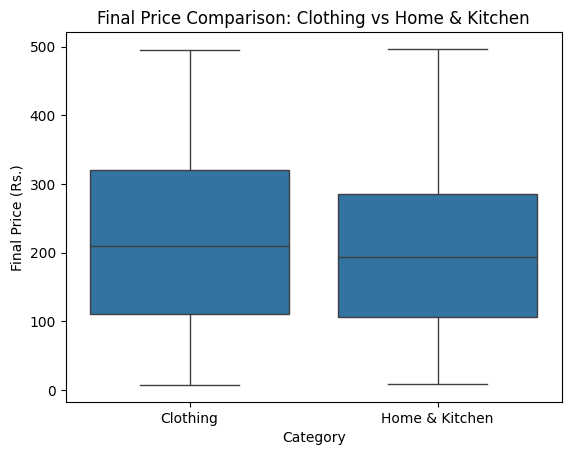

In [6]:
sns.boxplot(data=df[df['Category'].isin(['Clothing', 'Home & Kitchen'])],
            x='Category', y='Final_Price(Rs.)')
plt.title('Final Price Comparison: Clothing vs Home & Kitchen')
plt.ylabel('Final Price (Rs.)')
plt.show()

### 2.1 The file has been saved to the cleaned data folder.

In [7]:
import os

os.makedirs("Data/cleaned_data", exist_ok=True)
df.to_csv("Data/cleaned_data/ecommerce_dataset_cleaned.csv", index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


### 2.1 There are no null values within this data.

In [8]:
print(df.isnull().sum())

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


### 2.1 There are no null values within this data.

In [9]:
df.isnull().values.any()

False

### 2.1 I have checked to see if there are no missing values as can be seen from the code above.There are no missing values.

### The date format has been changed from text based to numeric.

In [10]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='mixed', dayfirst=True, errors='coerce')


### The code below shows that the conversion was successful for all entries.

In [11]:
df[df['Purchase_Date'].isna()]

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date


### The code below shows that new columns have been added to aid better analysis of customer behaviour.

In [12]:
# Extract date parts for later use
df['Month'] = df['Purchase_Date'].dt.month_name()
df['Weekday'] = df['Purchase_Date'].dt.day_name()
df['Year'] = df['Purchase_Date'].dt.year


### The code below prints out the column headings and the new time period columns.

In [13]:
print(df.head())

    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date      Month  Weekday  Year  
0             31.05    Net Banking    2024-11-12   November  Tuesday  2024  
1            186.23    Net Banking    2024-02-09   February   Friday  2024  
2            237.76    Credit Card    2024-09-01  September   Sunday  2024  
3            129.89            UPI    2024-04-01      April   Monday  2024  
4            195.84    Net Banking    2024-09-27  September   Friday  2024  


C:\Users\rayaf\AppData\Local\Temp\ipykernel_10128\4131431461.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


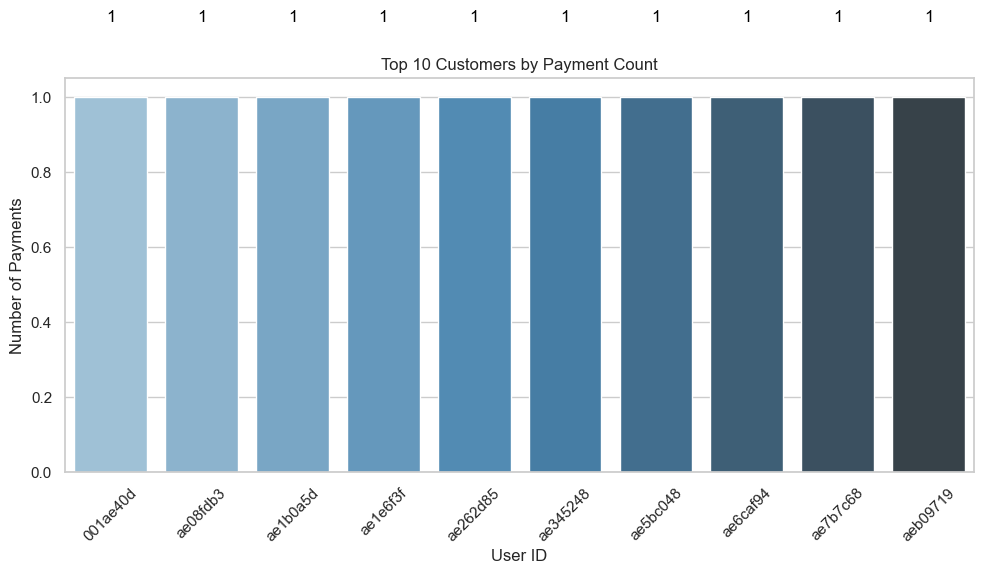

In [15]:



best_customer = df.groupby('User_ID')['Payment_Method'].count()


top_customers = best_customer.sort_values(ascending=False).head(10).reset_index()
top_customers.rename(columns={'Payment_Method': 'Payment_Count'}, inplace=True)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=top_customers,
    x='User_ID',
    y='Payment_Count',
    palette='Blues_d'
)


for index, row in top_customers.iterrows():
    bar.text(index, row.Payment_Count + 0.2, row.Payment_Count, color='black', ha="center")


plt.title('Top 10 Customers by Payment Count')
plt.xlabel('User ID')
plt.ylabel('Number of Payments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
